## Q.61. 4-連結数

*renketsu.png*を4-連結数により、色分けせよ。

4-連結数とは近傍との画素の状態を見る値である。
通常、近傍は注目画素x0(x,y)が0でない場合に対して、次のように定義される。

```bash
x4(x-1,y-1) x3(x,y-1) x2(x+1,y-1)
x5(x-1,y)   x0(x,y)   x1(x+1,y)
x6(x-1,y+1) x7(x,y+1) x8(x+1,y+1)
```

ここで4連結数とは、次式で計算される。

```bash
S = (x1 - x1 x2 x3) + (x3 - x3 x4 x5) + (x5 - x5 x6 x7) + (x7 - x7 x8 x1) 
```

S = [0,4]の範囲をとり、
- S = 0 は内部点
- S = 1 は端点
- S = 2 は連結点
- S = 3 は分岐点
- S = 4 は交差点
を示す。

|入力 (renketsu.png) |出力(answers/answer_61.png)|
|:---:|:---:|
|<img src="renketsu.png" width="50px">|<img src="answers/answer_61.png" width="50px">|

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read image
img = cv2.imread("renketsu.png").astype(np.float32)
H, W, C = img.shape

tmp = np.zeros((H, W), dtype=int)
tmp[img[..., 0]>0] = 1

out = np.zeros((H, W, 3), dtype=np.uint8)

for y in range(H):
    for x in range(W):
        if tmp[y, x] < 1:
            continue

        c = 0
        c += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
        c += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
        c += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
        c += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
        
        if c == 0:
            out[y,x] = [0, 0, 255]
        elif c == 1:
            out[y,x] = [0, 255, 0]
        elif c == 2:
            out[y,x] = [255, 0, 0]
        elif c == 3:
            out[y,x] = [255, 255, 0]
        elif c == 4:
            out[y,x] = [255, 0, 255]
                
out = out.astype(np.uint8)
display(Image.fromarray(out))

## Q.62. 8-連結数

*renketsu.png*を8-連結数により、色分けせよ。

8連結数とは

```bash
S = (x1 - x1 x2 x3) + (x3 - x3 x4 x5) + (x5 - x5 x6 x7) + (x7 - x7 x8 x1) 
```
において各x¥*の値の0と1を反転させた値を用いる。

|入力 (renketsu.png) |出力(answers/answer_62.png)|
|:---:|:---:|
|<img src="renketsu.png" width="50px">|<img src="answers/answer_62.png" width="50px">|

In [2]:
# Read image
img = cv2.imread("renketsu.png").astype(np.float32)
H, W, C = img.shape

_tmp = np.zeros((H, W), dtype=int)
_tmp[img[..., 0]>0] = 1

tmp = 1 - _tmp

out = np.zeros((H, W, 3), dtype=np.uint8)

for y in range(H):
    for x in range(W):
        if _tmp[y, x] < 1:
            continue

        c = 0
        c += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
        c += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
        c += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
        c += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
        
        if c == 0:
            out[y,x] = [0, 0, 255]
        elif c == 1:
            out[y,x] = [0, 255, 0]
        elif c == 2:
            out[y,x] = [255, 0, 0]
        elif c == 3:
            out[y,x] = [255, 255, 0]
        elif c == 4:
            out[y,x] = [255, 0, 255]
                
out = out.astype(np.uint8)
display(Image.fromarray(out))

## Q.63. 細線化処理

*gazo.png* を細線化せよ。

細線化とは画素の幅を1にする処理であり、ここでは次のアルゴリズムに沿って処理を行え。

1. 左上からラスタスキャンする。
2. x0(x,y)=0ならば、処理なし。x0(x,y)=1ならば次の3条件を満たす時にx0=0に変える。
(1) 注目画素の4近傍に0が一つ以上存在する
(2) x0の4-連結数が1である
(3) x0の8近傍に1が3つ以上存在する
3. 一回のラスタスキャンで2の変更数が0になるまで、ラスタスキャンを繰り返す。

細線化にはヒルディッチのアルゴリズム(Q.64)や、Zhang-Suenのアルゴリズム(Q.65)、田村のアルゴリズムなどが存在する。

|入力 (gazo.png) |出力(answers/answer_63.png)|
|:---:|:---:|
|![](gazo.png)|![](answers/answer_63.png)|

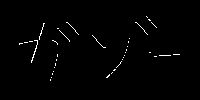

In [3]:
# Read image
img = cv2.imread("gazo.png").astype(np.float32)
H, W, C = img.shape

out = np.zeros((H, W), dtype=int)
out[img[..., 0]>0] = 1

count = 1
while count > 0:
    count = 0
    tmp = out.copy()
    for y in range(H):
        for x in range(W):
            if out[y, x] < 1:
                continue
            
            judge = 0
            
            ## condition 1
            if (tmp[y,min(x+1,W-1)] + tmp[max(y-1,0), x] + tmp[y,max(x-1,0)] + tmp[min(y+1,H-1),x]) < 4:
                judge += 1
                
            ## condition 2
            c = 0
            c += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)]*tmp[max(y-1,0),min(x+1,W-1)]*tmp[max(y-1,0),x])
            c += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x]*tmp[max(y-1,0),max(x-1,0)]*tmp[y,max(x-1,0)])
            c += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)]*tmp[min(y+1,H-1),max(x-1,0)]*tmp[min(y+1,H-1),x])
            c += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x]*tmp[min(y+1,H-1),min(x+1,W-1)]*tmp[y,min(x+1,W-1)])
            if c == 1:
                judge += 1
                
            ##x condition 3
            if np.sum(tmp[max(y-1,0):min(y+2,H), max(x-1,0):min(x+2,W)]) >= 4:
                judge += 1
            
            if judge == 3:
                out[y,x] = 0
                count += 1

out = out.astype(np.uint8) * 255
display(Image.fromarray(out))

## Q.64. ヒルディッチの細線化

*gazo.png* にヒルディッチの細線化を行え。

アルゴリズムは、次の通り。

1. 左上からラスタスキャンする。
2. x0(x,y)=0ならば、処理なし。x0(x,y)=1ならば次の5条件を満たす時にx0=-1に変える。
    1. 注目画素の4近傍に0が一つ以上存在する
    2. x0の8-連結数が1である
    3. x1〜x8の絶対値の合計が2以上
    4. x0の8近傍に1が1つ以上存在する
    5. xn(n=1〜8)全てに対して以下のどちらかが成り立つ
        - xnが-1以外
        - xnを0とした時、x0の8-連結数が1である
3. 各画素の-1を0に変える
4. 一回のラスタスキャンで3の変更数が0になるまで、ラスタスキャンを繰り返す。

|入力 (gazo.png) |出力(answers/answer_64.png)|
|:---:|:---:|
|![](gazo.png)|![](answers/answer_64.png)|

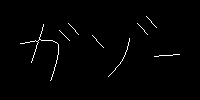

In [4]:
# Read image
img = cv2.imread("gazo.png").astype(np.float32)
H, W, C = img.shape

out = np.zeros((H, W), dtype=int)
out[img[..., 0]>0] = 1

tmp = out.copy()
_tmp = 1 - tmp

count = 1
while count > 0:
    count = 0
    tmp = out.copy()
    _tmp = 1 - tmp

    tmp2 = out.copy()
    _tmp2 = 1 - tmp2
    
    for y in range(H):
        for x in range(W):
            if out[y, x] < 1:
                continue
            
            judge = 0
            
            ## condition 1
            if (tmp[y,min(x+1,W-1)] * tmp[max(y-1,0), x] * tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),x]) == 0:
                judge += 1
                
            ## condition 2
            c = 0
            c += (_tmp[y,min(x+1,W-1)] - _tmp[y,min(x+1,W-1)] * _tmp[max(y-1,0),min(x+1,W-1)] * _tmp[max(y-1,0),x])
            c += (_tmp[max(y-1,0),x] - _tmp[max(y-1,0),x] * _tmp[max(y-1,0),max(x-1,0)] * _tmp[y,max(x-1,0)])
            c += (_tmp[y,max(x-1,0)] - _tmp[y,max(x-1,0)] * _tmp[min(y+1,H-1),max(x-1,0)] * _tmp[min(y+1,H-1),x])
            c += (_tmp[min(y+1,H-1),x] - _tmp[min(y+1,H-1),x] * _tmp[min(y+1,H-1),min(x+1,W-1)] * _tmp[y,min(x+1,W-1)])
            if c == 1:
                judge += 1
                
            ## condition 3
            if np.sum(tmp[max(y-1,0):min(y+2,H), max(x-1,0):min(x+2,W)]) >= 3:
                judge += 1

            ## condition 4
            if np.sum(out[max(y-1,0):min(y+2,H), max(x-1,0):min(x+2,W)]) >= 2:
                judge += 1

            ## condition 5
            _tmp2 = 1-out

            c = 0
            c += (_tmp2[y,min(x+1,W-1)] - _tmp2[y,min(x+1,W-1)] * _tmp2[max(y-1,0),min(x+1,W-1)] * _tmp2[max(y-1,0),x])
            c += (_tmp2[max(y-1,0),x] - _tmp2[max(y-1,0),x] * (1-tmp[max(y-1,0),max(x-1,0)]) * _tmp2[y,max(x-1,0)])
            c += (_tmp2[y,max(x-1,0)] - _tmp2[y,max(x-1,0)] * _tmp2[min(y+1,H-1),max(x-1,0)] * _tmp2[min(y+1,H-1),x])
            c += (_tmp2[min(y+1,H-1),x] - _tmp2[min(y+1,H-1),x] * _tmp2[min(y+1,H-1),min(x+1,W-1)] * _tmp2[y,min(x+1,W-1)])
            if c == 1 or (out[max(y-1,0), max(x-1,0)] != tmp[max(y-1,0), max(x-1,0)]):
                judge += 1

            c = 0
            c += (_tmp2[y,min(x+1,W-1)] - _tmp2[y,min(x+1,W-1)] * _tmp2[max(y-1,0),min(x+1,W-1)] * (1-tmp[max(y-1,0),x]))
            c += ((1-tmp[max(y-1,0),x]) - (1-tmp[max(y-1,0),x]) * _tmp2[max(y-1,0),max(x-1,0)] * _tmp2[y,max(x-1,0)])
            c += (_tmp2[y,max(x-1,0)] - _tmp2[y,max(x-1,0)] * _tmp2[min(y+1,H-1),max(x-1,0)] * _tmp2[min(y+1,H-1),x])
            c += (_tmp2[min(y+1,H-1),x] - _tmp2[min(y+1,H-1),x] * _tmp2[min(y+1,H-1),min(x+1,W-1)] * _tmp2[y,min(x+1,W-1)])
            if c == 1 or (out[max(y-1,0), x] != tmp[max(y-1,0), x]):
                judge += 1

            c = 0
            c += (_tmp2[y,min(x+1,W-1)] - _tmp2[y,min(x+1,W-1)] * (1-tmp[max(y-1,0),min(x+1,W-1)]) * _tmp2[max(y-1,0),x])
            c += (_tmp2[max(y-1,0),x] - _tmp2[max(y-1,0),x] * _tmp2[max(y-1,0),max(x-1,0)] * _tmp2[y,max(x-1,0)])
            c += (_tmp2[y,max(x-1,0)] - _tmp2[y,max(x-1,0)] * _tmp2[min(y+1,H-1),max(x-1,0)] * _tmp2[min(y+1,H-1),x])
            c += (_tmp2[min(y+1,H-1),x] - _tmp2[min(y+1,H-1),x] * _tmp2[min(y+1,H-1),min(x+1,W-1)] * _tmp2[y,min(x+1,W-1)])
            if c == 1 or (out[max(y-1,0), min(x+1,W-1)] != tmp[max(y-1,0), min(x+1,W-1)]):
                judge += 1

            c = 0
            c += (_tmp2[y,min(x+1,W-1)] - _tmp2[y,min(x+1,W-1)] * _tmp2[max(y-1,0),min(x+1,W-1)] * _tmp2[max(y-1,0),x])
            c += (_tmp2[max(y-1,0),x] - _tmp2[max(y-1,0),x] * _tmp2[max(y-1,0),max(x-1,0)] * (1-tmp[y,max(x-1,0)]))
            c += ((1-tmp[y,max(x-1,0)]) - (1-tmp[y,max(x-1,0)]) * _tmp2[min(y+1,H-1),max(x-1,0)] * _tmp2[min(y+1,H-1),x])
            c += (_tmp2[min(y+1,H-1),x] - _tmp2[min(y+1,H-1),x] * _tmp2[min(y+1,H-1),min(x+1,W-1)] * _tmp2[y,min(x+1,W-1)])
            if c == 1 or (out[y, max(x-1,0)] != tmp[y, max(x-1,0)]):
                judge += 1
            
            if judge >= 8:
                out[y,x] = 0
                count += 1
                
out = out.astype(np.uint8) * 255
display(Image.fromarray(out))

## Q.65. Zhang-Suenの細線化

*gazo.png*にZhang-Suenの細線化を行え。

ただし、以下の操作は全て0が線、1が背景とするので、*gazo.png*の値を反転させる必要があることに注意。

注目画素x1(x,y)に対して8近傍を次のように定義する。

```bash
x9 x2 x3
x8 x1 x4
x7 x6 x5
```
これらに対して二つのステップを考える。

Step.1
ラスタスキャンを行い、以下の5条件を満たすピクセルを全て記録する。
1. 黒画素である
2. x2, x3, ..., x9, x2と時計まわりに見て、0から1に変わる回数がちょうど1
3. x2, x3, ..., x9の中で1の個数が2以上6以下
4. x2, x4, x6のどれかが1
5. x4, x6, x8のどれかが1
記録したピクセルを全て1に変更する。

Step.2
ラスタスキャンを行い、以下の5条件を満たすピクセルを全て記録する。
1. 黒画素である
2. x2, x3, ..., x9, x2と時計まわりに見て、0から1に変わる回数がちょうど1
3. x2, x3, ..., x9の中で1の個数が2以上6以下
4. x2, x4, x8のどれかが1
5. x2, x6, x8のどれかが1
記録したピクセルを全て1に変更する。

Step1, 2で変更する点がなくなるまで交互に繰り返す。

|入力 (gazo.png) |出力(answers/answer_65.png)|
|:---:|:---:|
|![](gazo.png)|![](answers/answer_65.png)|

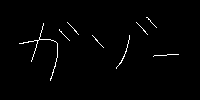

In [5]:
# Read image
img = cv2.imread("gazo.png").astype(np.float32)
H, W, C = img.shape

out = np.zeros((H, W), dtype=int)
out[img[..., 0]>0] = 1

out = 1 - out

while True:
    s1 = []
    s2 = []

    # step 1
    for y in range(1, H-1):
        for x in range(1, W-1):
            
            # condition 1
            if out[y, x] > 0:
                continue

            # condition 2
            f1 = 0
            if (out[y-1, x+1] - out[y-1, x]) == 1:
                f1 += 1
            if (out[y, x+1] - out[y-1, x+1]) == 1:
                f1 += 1
            if (out[y+1, x+1] - out[y, x+1]) == 1:
                f1 += 1
            if (out[y+1, x] - out[y+1,x+1]) == 1:
                f1 += 1
            if (out[y+1, x-1] - out[y+1, x]) == 1:
                f1 += 1
            if (out[y, x-1] - out[y+1, x-1]) == 1:
                f1 += 1
            if (out[y-1, x-1] - out[y, x-1]) == 1:
                f1 += 1
            if (out[y-1, x] - out[y-1, x-1]) == 1:
                f1 += 1

            if f1 != 1:
                continue
                
            # condition 3
            f2 = np.sum(out[y-1:y+2, x-1:x+2])
            if f2 < 2 or f2 > 6:
                continue
            
            # condition 4
            if out[y-1, x] + out[y, x+1] + out[y+1, x] < 1:
                continue

            # condition 5
            if out[y, x+1] + out[y+1, x] + out[y, x-1] < 1:
                continue
                
            s1.append([y, x])

    for v in s1:
        out[v[0], v[1]] = 1

    # step 2
    for y in range(1, H-1):
        for x in range(1, W-1):
            
            # condition 1
            if out[y, x] > 0:
                continue

            # condition 2
            f1 = 0
            if (out[y-1, x+1] - out[y-1, x]) == 1:
                f1 += 1
            if (out[y, x+1] - out[y-1, x+1]) == 1:
                f1 += 1
            if (out[y+1, x+1] - out[y, x+1]) == 1:
                f1 += 1
            if (out[y+1, x] - out[y+1,x+1]) == 1:
                f1 += 1
            if (out[y+1, x-1] - out[y+1, x]) == 1:
                f1 += 1
            if (out[y, x-1] - out[y+1, x-1]) == 1:
                f1 += 1
            if (out[y-1, x-1] - out[y, x-1]) == 1:
                f1 += 1
            if (out[y-1, x] - out[y-1, x-1]) == 1:
                f1 += 1

            if f1 != 1:
                continue
                
            # condition 3
            f2 = np.sum(out[y-1:y+2, x-1:x+2])
            if f2 < 2 or f2 > 6:
                continue
            
            # condition 4
            if out[y-1, x] + out[y, x+1] + out[y, x-1] < 1:
                continue

            # condition 5
            if out[y-1, x] + out[y+1, x] + out[y, x-1] < 1:
                continue
                
            s2.append([y, x])

    for v in s2:
        out[v[0], v[1]] = 1

    if len(s1) < 1 and len(s2) < 1:
        break

out = 1 - out
out = out.astype(np.uint8) * 255
display(Image.fromarray(out))

## Q.66. HOG (Step.1) 勾配強度・勾配角度

*imoir.jpg*のHOG特徴量の勾配強度・勾配角度を求めよ。

HOG(Histogram of Oriented Gradients)とは画像の特徴量表現の一種である。

特徴量とは画像の状態などを表すベクトル集合のことである。

画像認識(画像が何を写した画像か)や検出（画像の中で物体がどこにあるか）では、(1)画像から特徴量を得て(特徴抽出)、(2)特徴量を基に認識や検出を行う(認識・検出)。

ディープラーニングでは特徴抽出から認識までを機械学習により自動で行うため、HOGなどは見られなくなっているが、ディープラーニングが流行る前まではHOGは特徴量表現としてよく使われたらしい。

HOGは以下のアルゴリズムで得られる。
1. 画像をグレースケール化し、x、ｙ方向の輝度勾配を求める
 
```bash
x方向: gx = I(x+1, y) - I(x-1, y)
y方向: gy = I(x, y+1) - I(x, y-1)
```
2. gx, gyから勾配強度と勾配角度を求める。

```bash
勾配強度: mag = sqrt(gt ** 2 + gy ** 2)
勾配角度: ang = arctan(gy / gx)
```
3. 勾配角度を [0, 180]で9分割した値に量子化する。つまり、[0,20]には0、[20, 40]には1というインデックスを求める。
4. 画像をN x Nの領域に分割し(この領域をセルという)、セル内で3で求めたインデックスのヒストグラムを作成する。ただし、当表示は1でなく勾配角度を求める。
5. C x Cのセルを１つとして(これをブロックという)、ブロック内のセルのヒストグラムを次式で正規化する。これを1セルずつずらしながら行うので、一つのセルが何回も正規化される。

```bash
h(t) = h(t) / sqrt(Sum h(t) + epsilon)
通常は　epsilon=1
```

以上でHOG特徴量が求められる。

ここでは1から3までを行う。

解答例はみやすくするため、graは色付けしてある。またmagは[0, 255]に正規化してある。

|入力 (imori.jpg) |勾配強度(answers/answer_66_mag.jpg)|勾配角度(answers/answer_66_gra.jpg)|
|:---:|:---:|:---:|
|![](imori.jpg)|![](answers/answer_66_mag.jpg)|![](answers/answer_66_gra.jpg)|

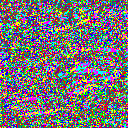

In [6]:
# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

# Magnitude and gradient
gray = np.pad(gray, (1, 1), 'edge')

gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
gx[gx == 0] = 0.000001

mag = np.sqrt(gx ** 2 + gy ** 2)
gra = np.arctan(gy / gx)
gra[gra<0] = np.pi / 2 + gra[gra < 0] + np.pi / 2

# Gradient histogram
gra_n = np.zeros_like(gra, dtype=int)

d = np.pi / 9
for i in range(9):
    gra_n[np.where((gra >= d * i) & (gra <= d * (i+1)))] = i

# Draw
_mag = (mag / mag.max() * 255).astype(np.uint8)

cv2.imwrite("out_mag.jpg", _mag)

# Save result
out = np.zeros((H, W, 3), dtype=np.uint8)
C = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255],
     [127, 127, 0], [127, 0, 127], [0, 127, 127]]
for i in range(9):
    out[gra_n == i] = C[i]

display(Image.fromarray(out))

## Q.67. HOG (Step.2) 勾配ヒストグラム

ここではHOGの4を実装する。

N=8として、8x8の領域を1セルとして、勾配角度のインデックスに勾配強度を投票する形式でヒストグラムを作成せよ。

解答は 
```bash
1 2 3
4 5 6
7 8 9
```
の順に量子化したインデックスに対応するヒストグラムを示す。

|入力 (imori.jpg) |出力(answers/answer_67.png)|
|:---:|:---:|
|![](imori.jpg)|<img src="answers/answer_67.png" width="400px">|

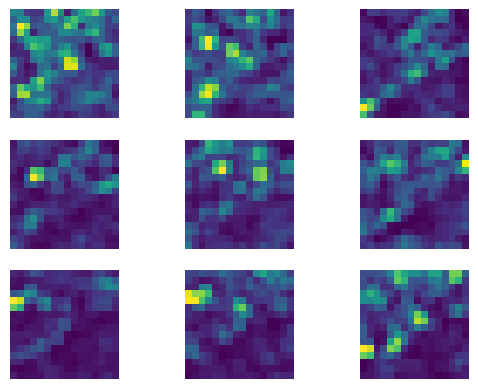

In [7]:
# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

# Magnitude and gradient
gray = np.pad(gray, (1, 1), 'edge')

gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
gx[gx == 0] = 0.000001

mag = np.sqrt(gx ** 2 + gy ** 2)
gra = np.arctan(gy / gx)
gra[gra<0] = np.pi / 2 + gra[gra < 0] + np.pi / 2

# Gradient histogram
gra_n = np.zeros_like(gra, dtype=int)

d = np.pi / 9
for i in range(9):
    gra_n[np.where((gra >= d * i) & (gra <= d * (i+1)))] = i
    
N = 8
HH = H // N
HW = W // N
Hist = np.zeros((HH, HW, 9), dtype=np.float32)
for y in range(HH):
    for x in range(HW):
        for j in range(N):
            for i in range(N):
                Hist[y, x, gra_n[y*4+j, x*4+i]] += mag[y*4+j, x*4+i]
                

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(Hist[..., i])
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")
plt.show()

## Q.68. HOG (Step.3) ヒストグラム正規化

ここではHOGの5を実装する。

C = 3 として、3 x 3のセルを1ブロックとして扱い、ヒストグラムの正規化を行え。

```bash
h(t) = h(t) / sqrt(Sum h(t) + epsilon)
通常は　epsilon=1
```

これでHOG特徴量が得られた。

|入力 (imori.jpg) |出力(answers/answer_68.png)|
|:---:|:---:|
|![](imori.jpg)|<img src="answers/answer_68.png" width="400px">|

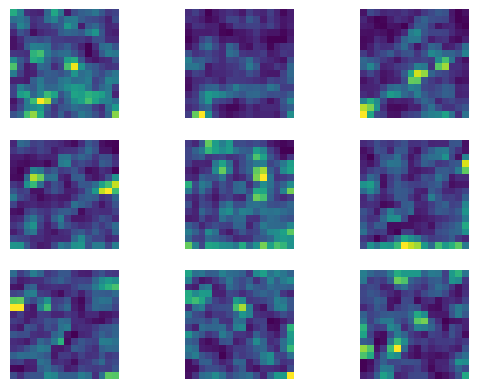

In [8]:
# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

# Magnitude and gradient
gray = np.pad(gray, (1, 1), 'edge')

gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
gx[gx == 0] = 0.000001

mag = np.sqrt(gx ** 2 + gy ** 2)
gra = np.arctan(gy / gx)
gra[gra<0] = np.pi / 2 + gra[gra < 0] + np.pi / 2

# Gradient histogram
gra_n = np.zeros_like(gra, dtype=int)

d = np.pi / 9
for i in range(9):
    gra_n[np.where((gra >= d * i) & (gra <= d * (i+1)))] = i

    
N = 8
HH = H // N
HW = W // N
Hist = np.zeros((HH, HW, 9), dtype=np.float32)
for y in range(HH):
    for x in range(HW):
        for j in range(N):
            for i in range(N):
                Hist[y, x, gra_n[y*4+j, x*4+i]] += mag[y*4+j, x*4+i]
                
## Normalization
C = 3
eps = 1
for y in range(HH):
    for x in range(HW):
        #for i in range(9):
        Hist[y, x] /= np.sqrt(np.sum(Hist[max(y-1,0):min(y+2, HH), max(x-1,0):min(x+2, HW)] ** 2) + eps)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(Hist[..., i])
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")
plt.show()

## Q.69. HOG (Step.4) 特徴量の描画

ここでは得られた特徴量を描画せよ。

描画は*imori.jpg*をグレースケール化したものに重ねれば見やすい。

方法としては、セル内のインデックスごとに角度がついて直線を描けばよく、ヒストグラムの値が大きいほど白、値が小さいほど黒で描くと見やすい。

解答例

|入力 (imori.jpg) |出力(answers/answer_69.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers/answer_69.jpg)|

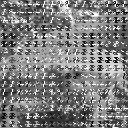

In [9]:
# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

# Magnitude and gradient
gray = np.pad(gray, (1, 1), 'edge')

gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
gx[gx == 0] = 0.000001

mag = np.sqrt(gx ** 2 + gy ** 2)
gra = np.arctan(gy / gx)
gra[gra<0] = np.pi / 2 + gra[gra < 0] + np.pi / 2

# Gradient histogram
gra_n = np.zeros_like(gra, dtype=int)

d = np.pi / 9
for i in range(9):
    gra_n[np.where((gra >= d * i) & (gra <= d * (i+1)))] = i

    
N = 8
HH = H // N
HW = W // N
Hist = np.zeros((HH, HW, 9), dtype=np.float32)
for y in range(HH):
    for x in range(HW):
        for j in range(N):
            for i in range(N):
                Hist[y, x, gra_n[y*4+j, x*4+i]] += mag[y*4+j, x*4+i]
                
## Normalization
C = 3
eps = 1
for y in range(HH):
    for x in range(HW):
        #for i in range(9):
        Hist[y, x] /= np.sqrt(np.sum(Hist[max(y-1,0):min(y+2, HH), max(x-1,0):min(x+2, HW)] ** 2) + eps)
        
## Draw
out = gray[1:H+1, 1:W+1].copy().astype(np.uint8)

for y in range(HH):
    for x in range(HW):
        cx = x * N + N // 2
        cy = y * N + N // 2
        x1 = cx + N // 2 - 1
        y1 = cy
        x2 = cx - N // 2 + 1
        y2 = cy

        h = Hist[y, x] / np.sum(Hist[y, x])
        h /= h.max()
        
        for c in range(9):
            #angle = (20 * c + 10 - 90) / 180. * np.pi
            angle = (20 * c + 10) / 180. * np.pi
            rx = int(np.sin(angle) * (x1 - cx) + np.cos(angle) * (y1 - cy) + cx)
            ry = int(np.cos(angle) * (x1 - cx) - np.cos(angle) * (y1 - cy) + cy)
            lx = int(np.sin(angle) * (x2 - cx) + np.cos(angle) * (y2 - cy) + cx)
            ly = int(np.cos(angle) * (x2 - cx) - np.cos(angle) * (y2 - cy) + cy)
        
            c = int(255. * h[c])
            cv2.line(out, (lx, ly), (rx, ry), (c, c, c), thickness=1)

display(Image.fromarray(out))

## Q.70. カラートラッキング

*imori.jpg*に対してHSVを用いて青色の箇所のみが255となる画像を作成せよ。

カラートラッキングとは特定の色の箇所を抽出する手法である。

ただし、RGBの状態で色成分を指定するのは256^3のパターンがあり、とても大変である（というか手動ではかなり難しい）ので、HSV変換を用いる。

HSV変換とは Q.5で用いた処理であるが、RGBをH(色相)、S(彩度)、V(明度)に変換する手法である。

- Saturation(彩度) 彩度が小さいほど白、彩度が大きいほど色が濃くなる。 0<=S<=1
- Value (明度) 明度が小さいほど黒くなり、明度が大きいほど色がきれいになる。 0<=V<=1
- Hue(色相) 色を0<=H<=360の角度で表し、具体的には次のように表される。

```bash
赤 黄色  緑  水色  青  紫   赤
0  60  120  180 240 300 360
```

つまり、青色のカラートラッキングを行うにはHSV変換を行い、180<=H<=260となる位置が255となるような二値画像を出力すればよい。

|入力 (imori.jpg) |出力(answers/answer_70.png)|
|:---:|:---:|
|![](imori.jpg)|![](answers/answer_70.png)|

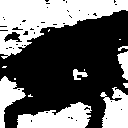

In [10]:
# Read image
img = cv2.imread("imori.jpg").astype(np.float32) / 255.

# RGB > HSV
out = np.zeros_like(img)

max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
## if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
## if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
## if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

# color tracking
mask = np.zeros_like(H)
mask[np.where((H>180) & (H<260))] = 255

out = mask.astype(np.uint8)
display(Image.fromarray(out))